In [2]:
!pip install WordCloud
import os
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

  Using cached wordcloud-1.7.0.tar.gz (216 kB)
  Running setup.py clean for WordCloud
Failed to build WordCloud
    Running setup.py install for WordCloud: started
    Running setup.py install for WordCloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\anaconda\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\이름\\AppData\\Local\\Temp\\pip-install-g00se89n\\WordCloud\\setup.py'"'"'; __file__='"'"'C:\\Users\\이름\\AppData\\Local\\Temp\\pip-install-g00se89n\\WordCloud\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\이름\AppData\Local\Temp\pip-wheel-z8u31qo1'
       cwd: C:\Users\이름\AppData\Local\Temp\pip-install-g00se89n\WordCloud\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.8\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.8\wordcloud
  copying wordcloud\wordcloud.py -

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
DATA_IN_PATH = './data_in/'
print('파일 크기: ')

for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        fsize = round(os.path.getsize(DATA_IN_PATH + file)/1000000, 2)
        file_unit = str(fsize) + 'MB'
        print(file.ljust(30)+ file_unit)

파일 크기: 
ratings.txt                   19.52MB
ratings_test.txt              4.89MB
ratings_train.txt             14.63MB


In [4]:
train_fname = DATA_IN_PATH + 'ratings_train.txt'
train_data = pd.read_csv(train_fname, header=0, delimiter='\t', quoting=csv.QUOTE_NONE)
# quoting 옵션은 csv파일을 dataframe으로 바꿀 때 따옴표(")는 무시하겠다는 뜻.
# ratings.txt 파일에는 따옴표는 없음. naver에서 말뭉치로 바꾸면서 모두 없앤 것으로 보임.

In [6]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [7]:
#train_data.shape
#train_data.info() # document 중에 null 값이 5개 있음.
#train_data["document"][:5]
train_data[train_data['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [2]:
#print('train data 수:{}'.format(len(train_data)))
print('train data = %d' % (len(train_data)))

NameError: name 'train_data' is not defined

In [61]:
f = lambda x: len(x)
train_length = train_data['document'].astype(str).apply(f)

train_length.head()
#train_length.sort_values(ascending=False)

40628     158
80320     158
124252    158
104248    153
56948     152
         ... 
95381       1
74295       1
55753       1
74294       1
79598       1
Name: document, Length: 150000, dtype: int64

Text(0, 0.5, 'Number of review')

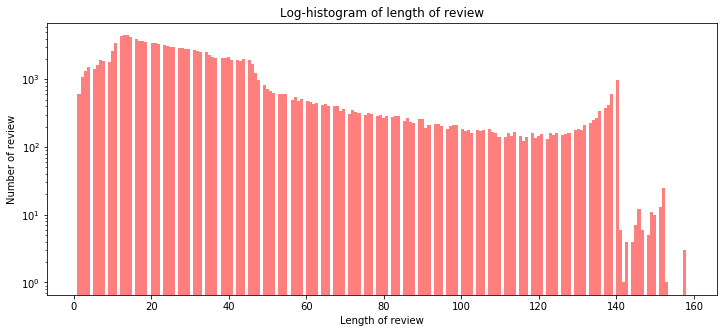

In [62]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [65]:
print('리뷰 길이 최대값: %d' % (np.max(train_length)))
print('리뷰 길이 최소값: %d' % (np.min(train_length)))
print('리뷰 길이 평균값: %.2f' % (np.mean(train_length)))
print('리뷰 길이 표준편차: %.2f' % (np.std(train_length)))
print('리뷰 길이 중간값: %.1f' % (np.median(train_length)))
print('리뷰 길이 제1사분위: %.1f' %  (np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: %.1f' % (np.percentile(train_length, 75)))

리뷰 길이 최대값: 158
리뷰 길이 최소값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x20381f5b898>,
 'caps': [<matplotlib.lines.Line2D at 0x20381f5bf98>,
 'boxes': [<matplotlib.lines.Line2D at 0x20381f5b748>],
 'medians': [<matplotlib.lines.Line2D at 0x20381fa8668>],
 'fliers': [<matplotlib.lines.Line2D at 0x20381fa8cc0>],
 'means': [<matplotlib.lines.Line2D at 0x20381fa89b0>]}

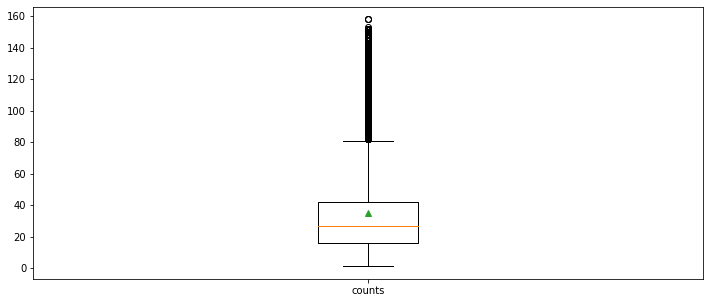

In [46]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

In [66]:
train_review = [review for review in train_data['document'] if type(review) is str]
#train_review[:2]

In [68]:
hangul_ttf = DATA_IN_PATH + 'NanumGothic.ttf'
wordcloud = WordCloud(font_path=hangul_ttf).generate(' '.join(train_review))

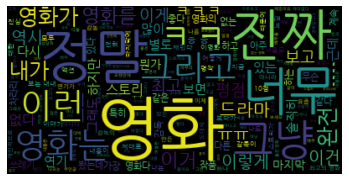

In [69]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

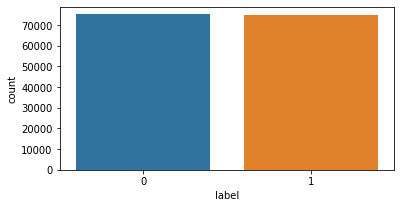

In [70]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['label'])

In [71]:
neg_review = train_data['label'].value_counts()[0]
pos_review = train_data['label'].value_counts()[1]
print('긍정 리뷰 개수:{}'.format(pos_review))
print('부정 리뷰 개수:{}'.format(neg_review))

긍정 리뷰 개수:74827
부정 리뷰 개수:75173


In [72]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x:'?' in x))
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x:'.' in x))

In [73]:
print('물음표가 있는 질문:{:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문:{:.2f}%'.format(fullstop * 100))

물음표가 있는 질문:8.25%
마침표가 있는 질문:51.76%
